# Practica 8

In [3]:
# Dependencias

import scipy
import numpy as np
import pandas as pd
import seaborn as sns
import seaborn.objects as so

# Para clustering
from sklearn.datasets import make_blobs
from sklearn.datasets import make_circles
from sklearn.preprocessing import MinMaxScaler 
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

# Para componentes principales
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## Ejercicio 1

In [41]:
# Preparacion de Data

tortugas = pd.DataFrame()

tortugas["longitud"] = [93,94,96,101,102,103,104,106]
tortugas["ancho"] = [76,78,80,84,85,82,83,83]

tortugas

,longitud,ancho
0,93,76
1,94,78
2,96,80
3,101,84
4,102,85
5,103,82
6,104,83
7,106,83


### a

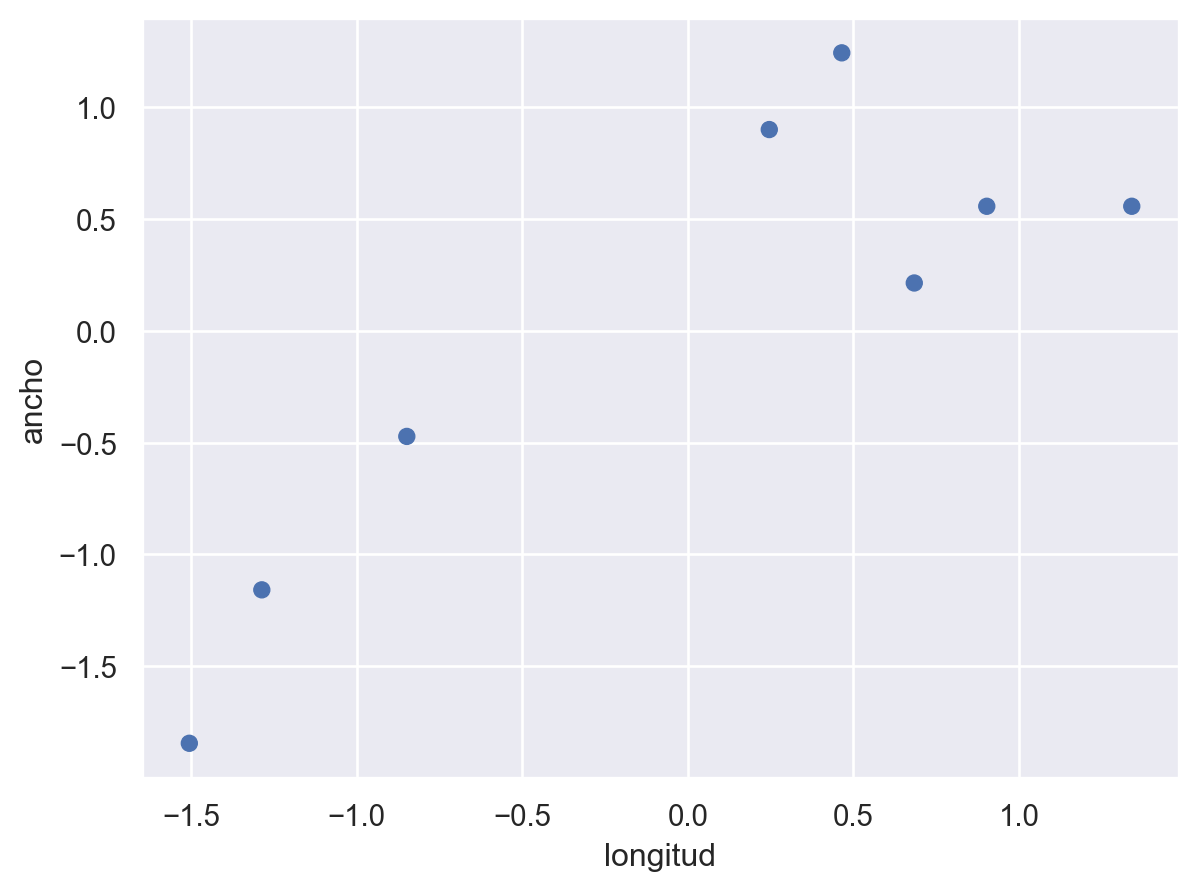

In [42]:
starTortugas = StandardScaler().set_output(transform="pandas").fit_transform(tortugas)

so.Plot(data=starTortugas, x = "longitud", y = "ancho").add(so.Dot())

### b

In [43]:
#Calculo Matriz Covarianza
covarianzaTortugas = (starTortugas.transpose()@starTortugas)/len(tortugas)

covarianzaTortugas

,longitud,ancho
longitud,1.000000,0.858572
ancho,0.858572,1.000000


In [45]:
#por Numpy

# Comparamos con el comando np.cov de Numpy
# Ttenemos que pasarle las variables como columnas.
# Si no usamos bias = 1, divide por n-1 en lugar de n.
np.cov(starTortugas.transpose(), bias = 1)

array([[1.        , 0.85857221],
       [0.85857221, 1.        ]])

In [46]:
#Calculo de Autovalores
Sigma = covarianzaTortugas

# eigh es un comando especial para calcular autovalores y autovectores de matrices simétricas
# Devuelve una dupla:
# - la primer componente es el vector de autovalores, ordenados de menor a mayor
# - la segunda componente es la matriz de autovectores. la i-ésima columna de U es el autovector correspondiente al i-ésimo autovalor
gamma, U = np.linalg.eigh(Sigma) 

#Autovalores
print(gamma)

#Autovectores como columnas
#print(U)

#Autovectores en Filas
#Autovector 1 = [0,0] y [1,0]
#Autovector 2 = [0,1] y [1,1]
U = np.flip(U, 1)

print(U)

[0.14142779 1.85857221]
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


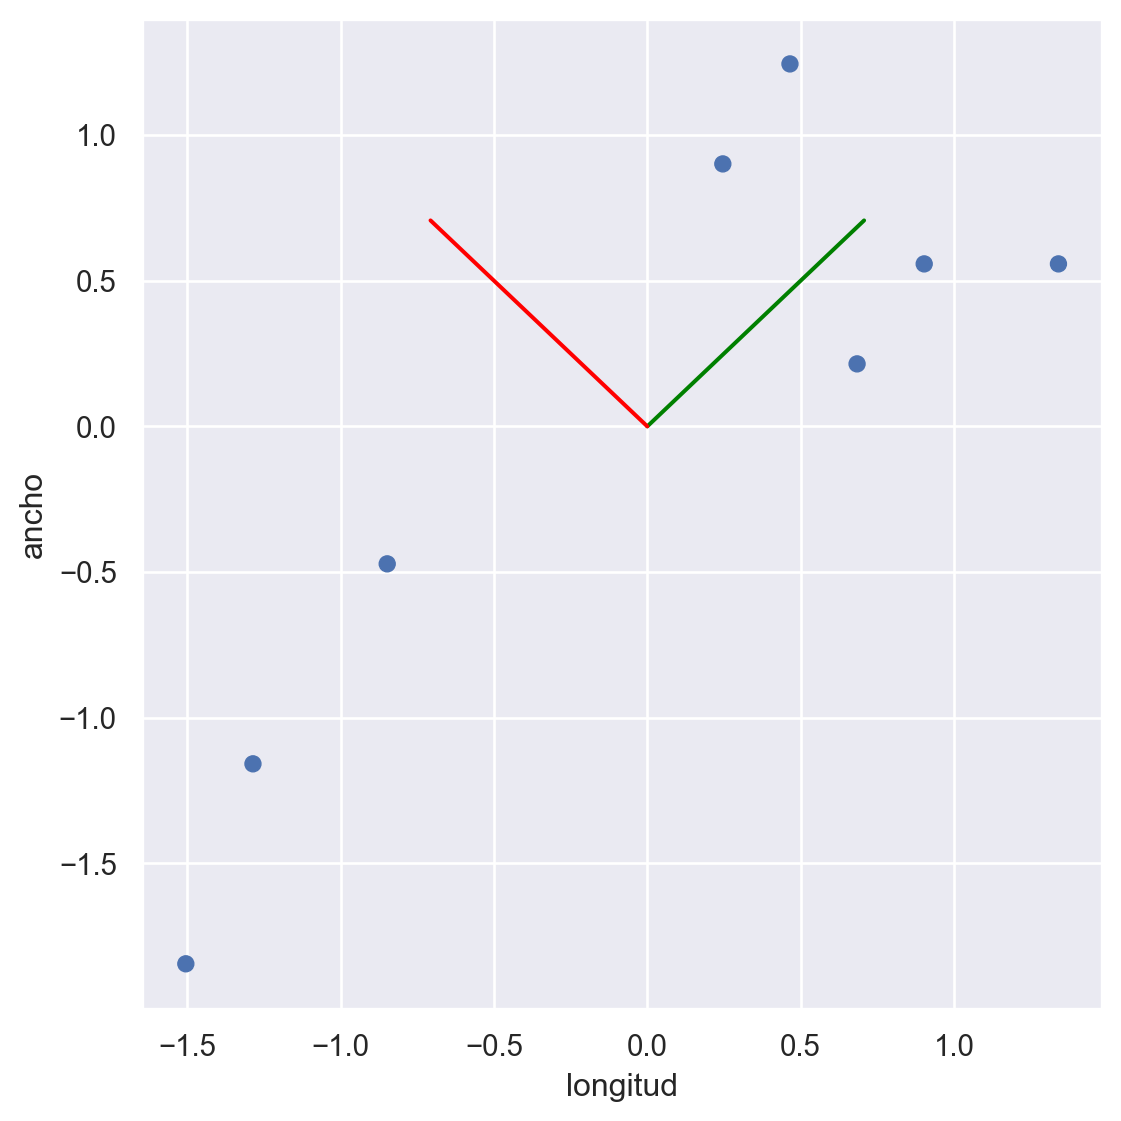

In [34]:
# Graficamos los autovectores
(
    so.Plot()
    .add(so.Dot(), x = starTortugas["longitud"], y = starTortugas["ancho"])
    .add(so.Line(color = "green"), x = [0, U[0,0]], y = [0, U[1,0]]) # Primera dirección principal
    .add(so.Line(color = "red"), x = [0, U[0,1]], y = [0, U[1,1]]) # Segunda dirección principal
    .layout(size = (6,6))
)

### C

In [47]:
# Calculo de Componentes principales

Z = starTortugas @ U

Z.columns = ["Z1", "Z2"]

Z

,Z1,Z2
0,-2.369234,-0.240423
1,-1.728894,0.090272
2,-0.933731,0.266144
3,0.811417,0.463067
4,1.208999,0.551003
5,0.635545,-0.332096
6,1.033126,-0.244160
7,1.342772,-0.553805


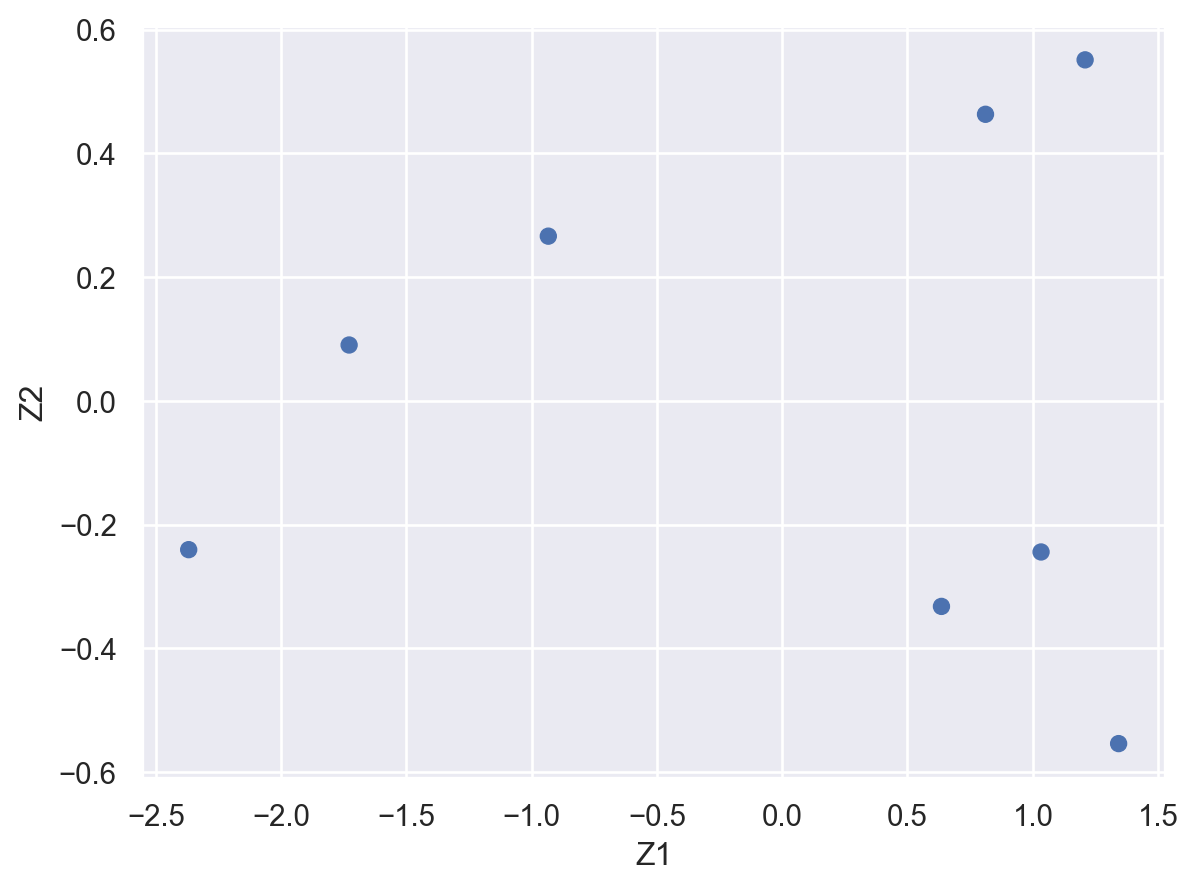

In [48]:
# Graficamos las nuevas variables.
(
    so.Plot(data = Z, x = "Z1", y = "Z2")
    .add(so.Dot())
)

Podemos ver como la longitud tiene mucha mas importancia ya que es la primera columna de Z mientras que el ancho es bastante bajo

### d

Como podemos ver en el ejercicio anterior, el dato de Z1 (que representa longitud) es la que mas importa ya que va de -3 a 2 mientras que Z2 de -1 a 1

### e

In [49]:
varianzaTotal = sum(gamma)

porcentajeVarianza = gamma/varianzaTotal

print("Varianza total")

print("Procentaje Varianza", porcentajeVarianza*100)

Varianza total
Procentaje Varianza [ 7.0713893 92.9286107]


Por lo tanto nos importa mucho mas la segunda componente (Ancho) y solo vamos a perder un 7% de la informacion si ignoramos la primera (Longitud) por lo que nos dice la varianza

## Ejercicio 2

In [50]:
matrizCovarianza = pd.DataFrame({"X1":[3,1,1],"X2":[1,3,1],"X3":[1,1,5]})

matrizCovarianza

,X1,X2,X3
0,3,1,1
1,1,3,1
2,1,1,5


In [13]:
#Calculo de Autovalores
Sigma = matrizCovarianza

# eigh es un comando especial para calcular autovalores y autovectores de matrices simétricas
# Devuelve una dupla:
# - la primer componente es el vector de autovalores, ordenados de menor a mayor
# - la segunda componente es la matriz de autovectores. la i-ésima columna de U es el autovector correspondiente al i-ésimo autovalor
gamma, U = np.linalg.eigh(Sigma) 

#Autovalores
print(gamma)

#Autovectores como columnas
#print(U)

#Autovectores en Filas
#Autovector 1 = [0,0] y [1,0]
#Autovector 2 = [0,1] y [1,1]
U = np.flip(U, 1)

print(U)

[2. 3. 6.]
[[ 0.40824829  0.57735027  0.70710678]
 [ 0.40824829  0.57735027 -0.70710678]
 [ 0.81649658 -0.57735027  0.        ]]


### b

Esta bien?

In [14]:
Z = Sigma @ U

Z.columns = ["Z1", "Z2","Z3"]

Z

,Z1,Z2,Z3
0,2.449490,1.732051,1.414214e+00
1,2.449490,1.732051,-1.414214e+00
2,4.898979,-1.732051,-1.110223e-16


In [15]:
varianzaTotal = sum(gamma)

porcentajeVarianza = gamma/varianzaTotal

print("Varianza total")

print("Procentaje Varianza", porcentajeVarianza*100)

Varianza total
Procentaje Varianza [18.18181818 27.27272727 54.54545455]


### c

In [16]:
# Como?
#Leer Componentes Principales me esta confundiendo

## Ejercicio 3

In [55]:
def componentesNecesarios(data, p_acum):
    dataEstrella = StandardScaler().set_output(transform="pandas").fit_transform(data)   
    matrizCovarianza = np.cov(dataEstrella.transpose(), bias = 1)
    
    #Calculo de Autovalores y Autovectores
    gamma, U = np.linalg.eigh(matrizCovarianza) 

    #Autovectores en Filas
    #Autovector 1 = [0,0] y [1,0]
    #Autovector 2 = [0,1] y [1,1]
    U = np.flip(U, 1)
    
    #Calculo de la varianza
    varianzaTotal = sum(gamma)

    porcentajeVarianza = gamma/varianzaTotal

    #Lo ordeno de mayor a menor
    porcentajeVarianza = sorted(porcentajeVarianza, reverse=True)
    print(porcentajeVarianza)
    
    porcentajeAcumulado = 0
    cantidadElementos = 0
    
    #Loopeo hasta quie la probabilidad pase p_acum
    for varianza in porcentajeVarianza:
        porcentajeAcumulado += varianza
        cantidadElementos += 1
        
        if porcentajeAcumulado > p_acum:
            break
    
    return cantidadElementos

In [57]:
data = sns.load_dataset("penguins").dropna().reset_index(drop=True)

data = data.drop("species",axis=1).drop("island",axis=1).drop("sex",axis=1)

componentesNecesarios(data,0.8)

[0.6863389313599905, 0.19452929284500142, 0.09216062988088336, 0.02697114591412471]


2

## Ejercicio 4

### a

In [77]:
data = pd.read_csv("../../Datasets/p8-chalets.csv", index_col="Promotora")

data

,DuracionHipoteca,PrecioMedio,SuperficieCocina
Promotora,,,
1,8.7,0.3,3.1
2,14.3,0.9,7.4
3,18.9,1.8,9.0
4,19.0,0.8,9.4
5,20.5,0.9,8.3
6,14.7,1.1,7.6
7,18.8,2.5,12.6
8,37.3,2.7,18.1
9,12.6,1.3,5.9


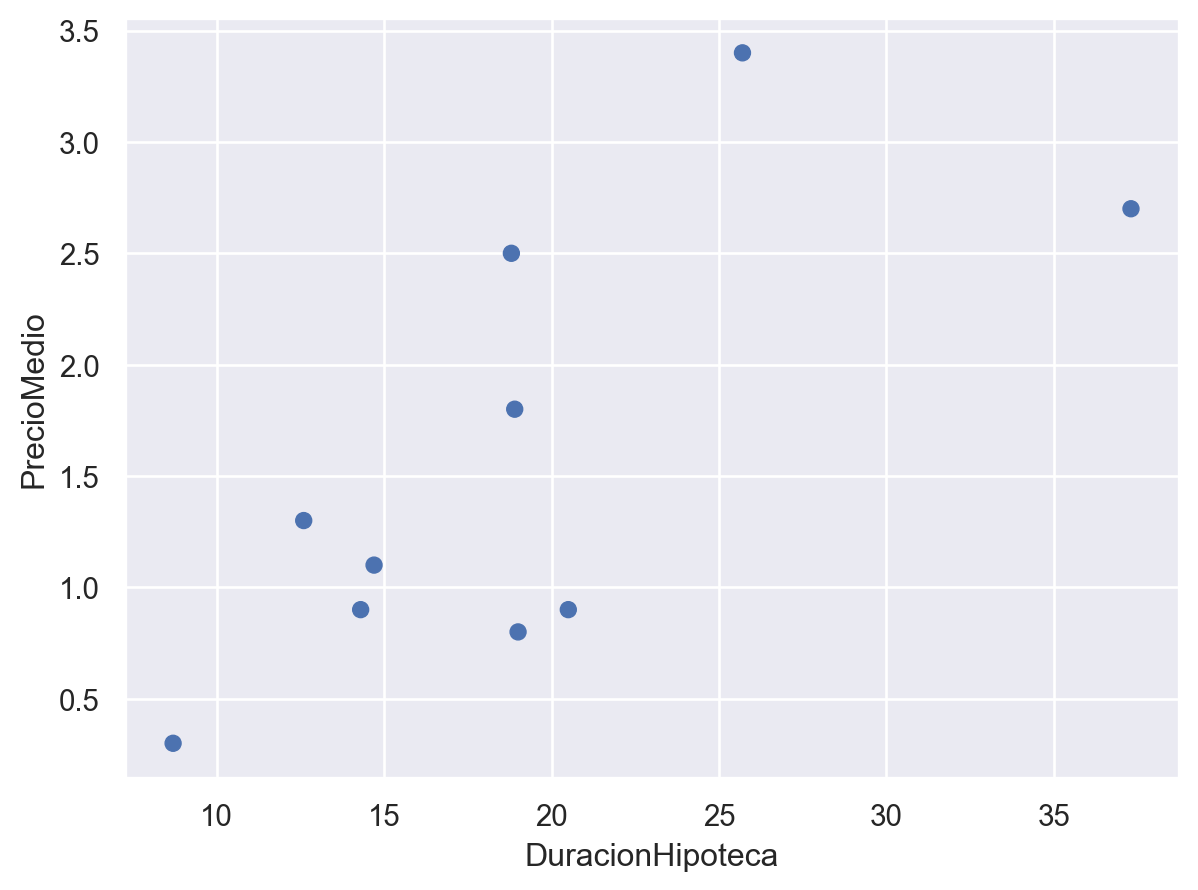

In [78]:
so.Plot(data=data, x="DuracionHipoteca",y="PrecioMedio").add(so.Dot())

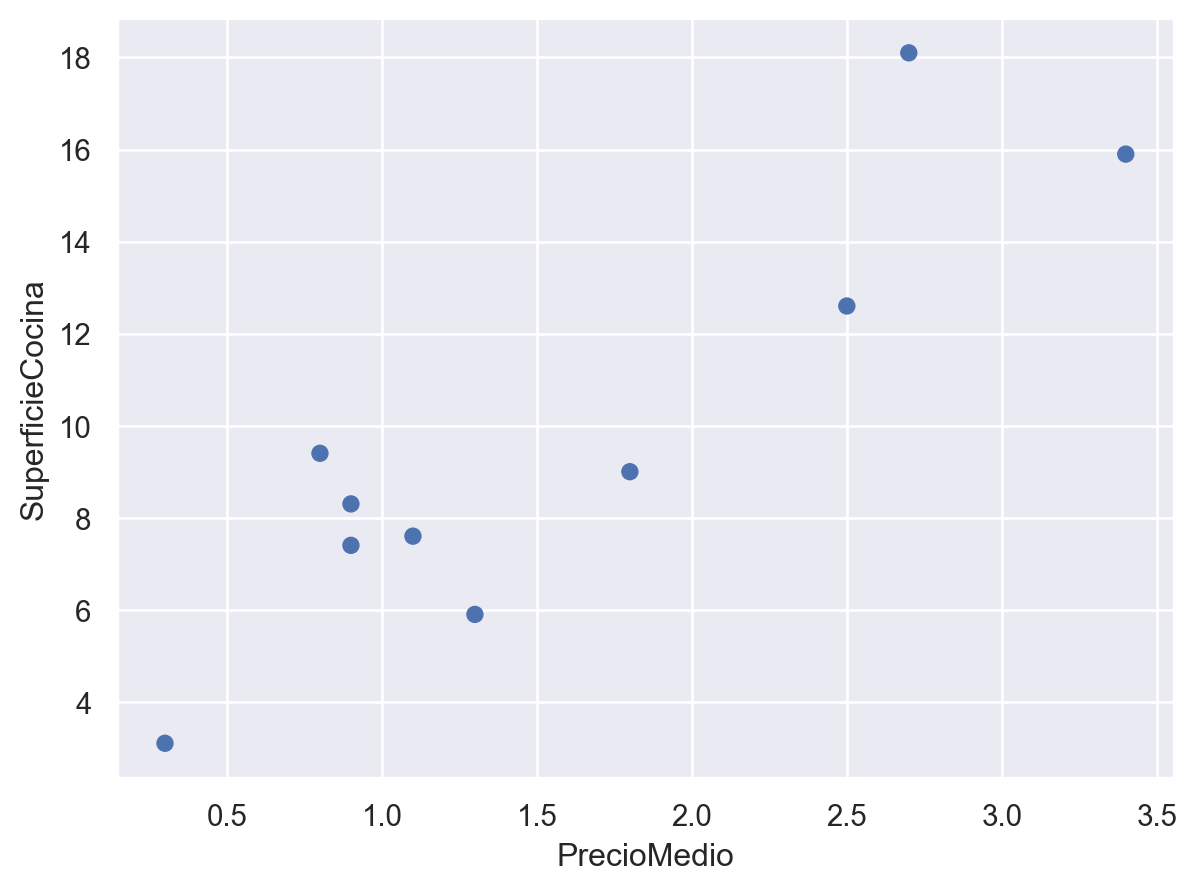

In [79]:
so.Plot(data=data, x="PrecioMedio",y="SuperficieCocina").add(so.Dot())

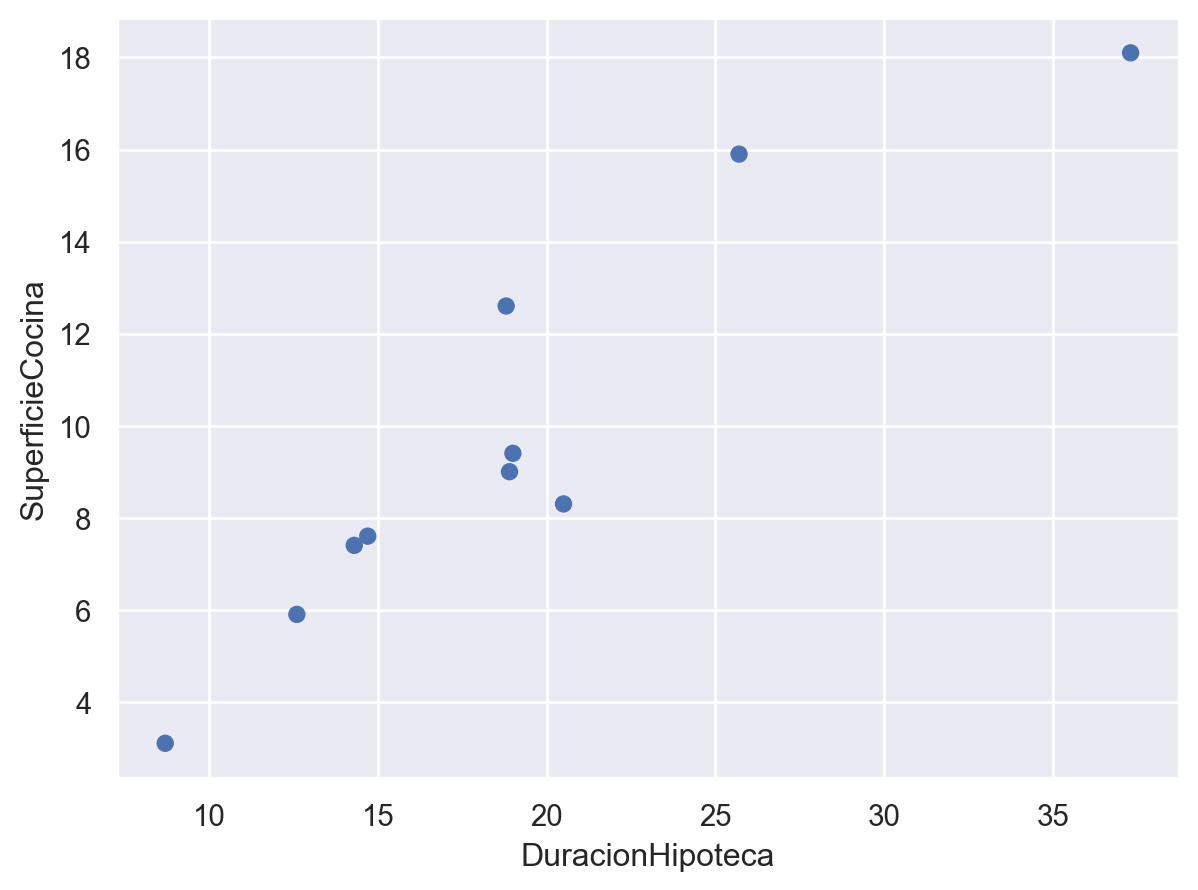

In [80]:
so.Plot(data=data, x="DuracionHipoteca",y="SuperficieCocina").add(so.Dot())

### b

In [81]:
dataEstrella = StandardScaler().set_output(transform="pandas").fit_transform(data)
matrizCovarianza = np.cov(dataEstrella.transpose(), bias = 1)

matrizCovarianza

array([[1.        , 0.72447283, 0.93217635],
       [0.72447283, 1.        , 0.8906068 ],
       [0.93217635, 0.8906068 , 1.        ]])

### c

No se como plantearlo asi que ni idea

### d

In [127]:
#Calculo Autovectores y Autovalores 

gamma, U = np.linalg.eigh(matrizCovarianza) 
U = np.flip(U, 1)

#Tomo el ultimo autovector que corresponde al de mayor autovalor, por lo tanto es el primero
primerAutovector = U[len(U)-1,:]

primerCompPrincipal = dataEstrella @ primerAutovector

primerCompPrincipal

0      0.739644
1      0.801025
2      1.004409
3      0.985723
4      0.823316
         ...   
145   -0.356688
146   -0.361486
147   -0.426117
148   -0.025553
149   -0.116537
Length: 150, dtype: float64

### e

In [129]:
print("Varianza total de Z1: " , ((primerAutovector.transpose() @ matrizCovarianza @ primerAutovector)/sum(gamma))*100,"%")

Varianza total de Z1:  13.004988654549832 %


## Ejercicio 5

### a

In [4]:
data = pd.read_csv("../../Datasets/p8-iris.txt", sep="\t")

data

,LongSepalo,AnchoSepalo,LongPetalo,AnchoPetalo
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


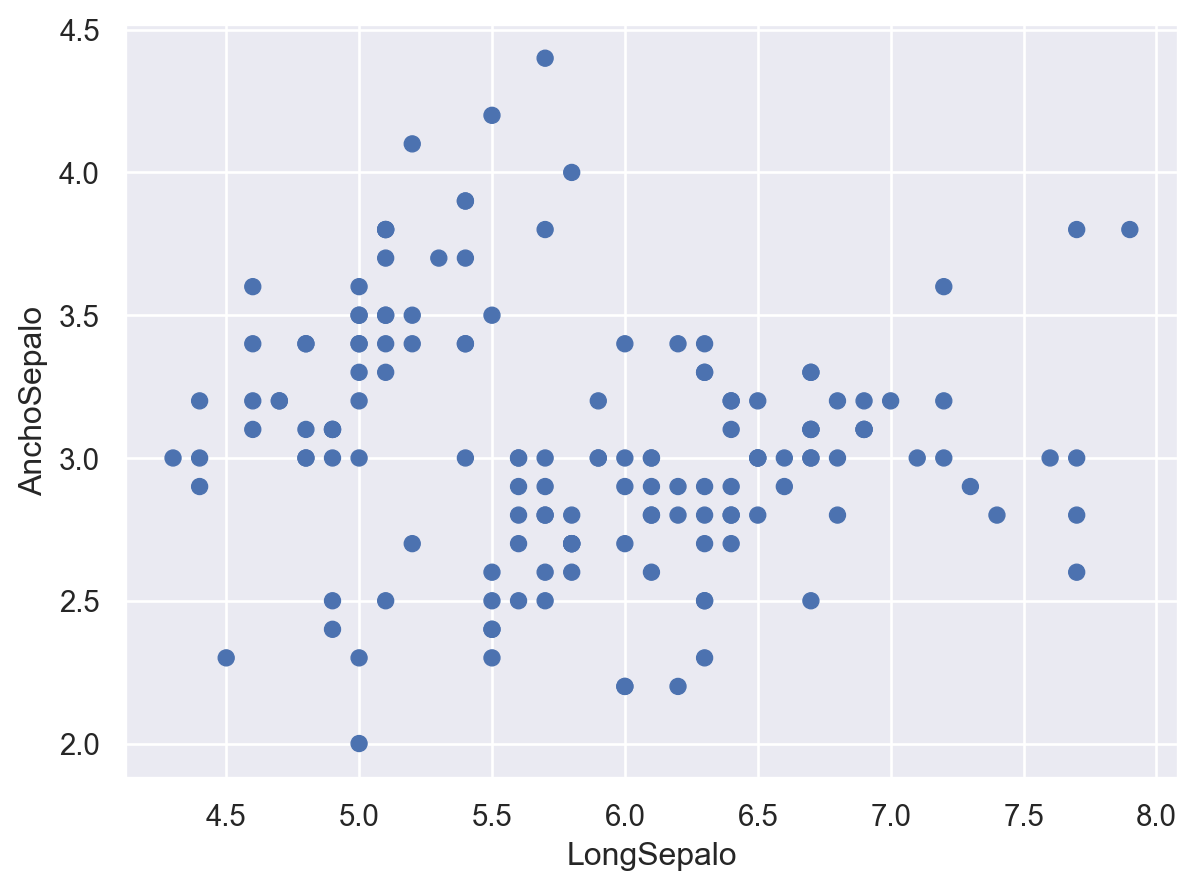

In [5]:
so.Plot(data=data, x="LongSepalo",y="AnchoSepalo").add(so.Dot())

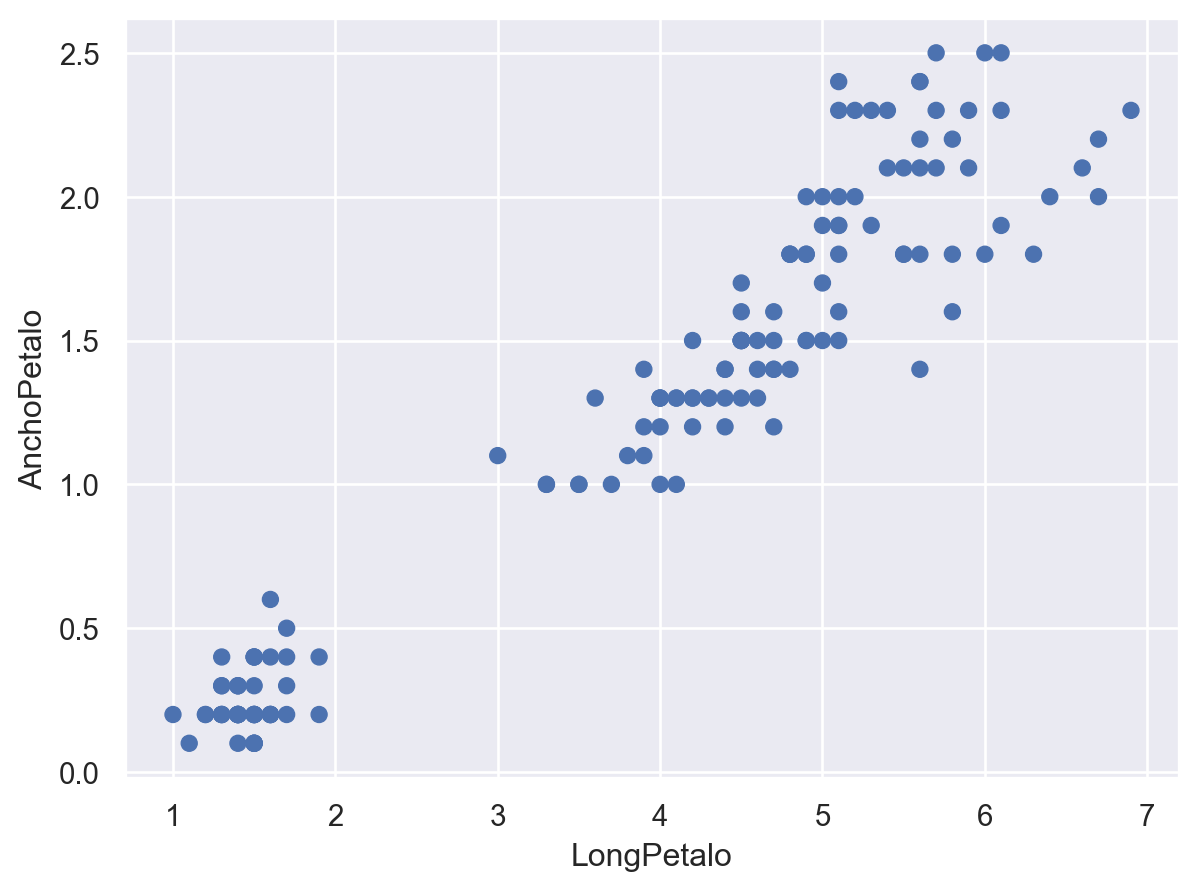

In [6]:
so.Plot(data=data, x="LongPetalo",y="AnchoPetalo").add(so.Dot())

In [7]:
componentesNecesarios(data, 0.9)

NameError: name 'componentesNecesarios' is not defined

In [8]:
dataEstrella = StandardScaler().set_output(transform="pandas").fit_transform(data)
matrizCovarianza = np.cov(dataEstrella.transpose())

gamma, U = np.linalg.eigh(matrizCovarianza)
U = np.flip(U, 1)

Z = dataEstrella@U

Z = Z.rename(columns={0:"Z1",1:"Z2",2:"Z3",3:"Z4"})

Z

,Z1,Z2,Z3,Z4
0,2.264542,0.505704,0.121943,0.023073
1,2.086426,-0.655405,0.227251,0.103208
2,2.367950,-0.318477,-0.051480,0.027825
3,2.304197,-0.575368,-0.098860,-0.066311
4,2.388777,0.674767,-0.021428,-0.037397
...,...,...,...,...
145,-1.870522,0.382822,-0.254532,0.388890
146,-1.558492,-0.905314,0.025382,0.221322
147,-1.520845,0.266795,-0.179277,0.118903
148,-1.376391,1.016362,-0.931405,0.024146


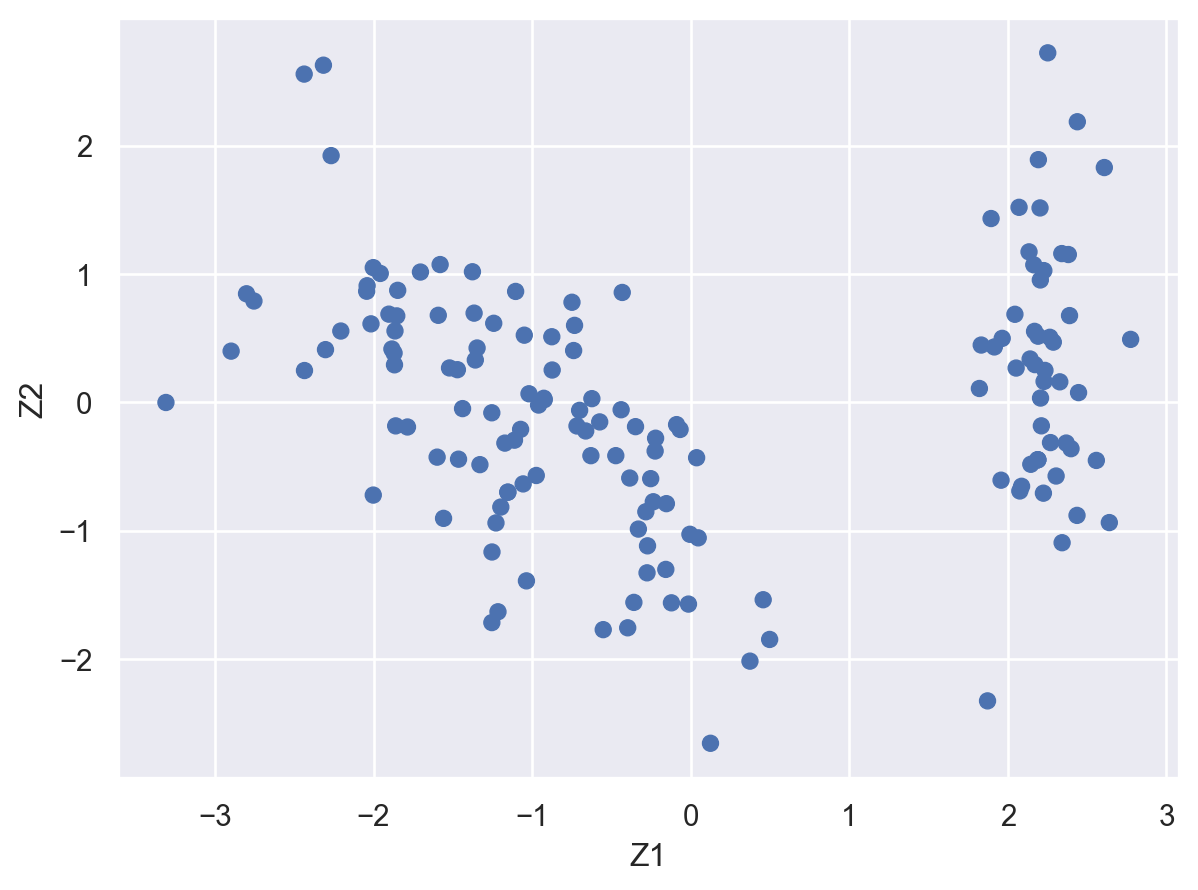

In [9]:
so.Plot(data=Z, x="Z1",y="Z2").add(so.Dot())

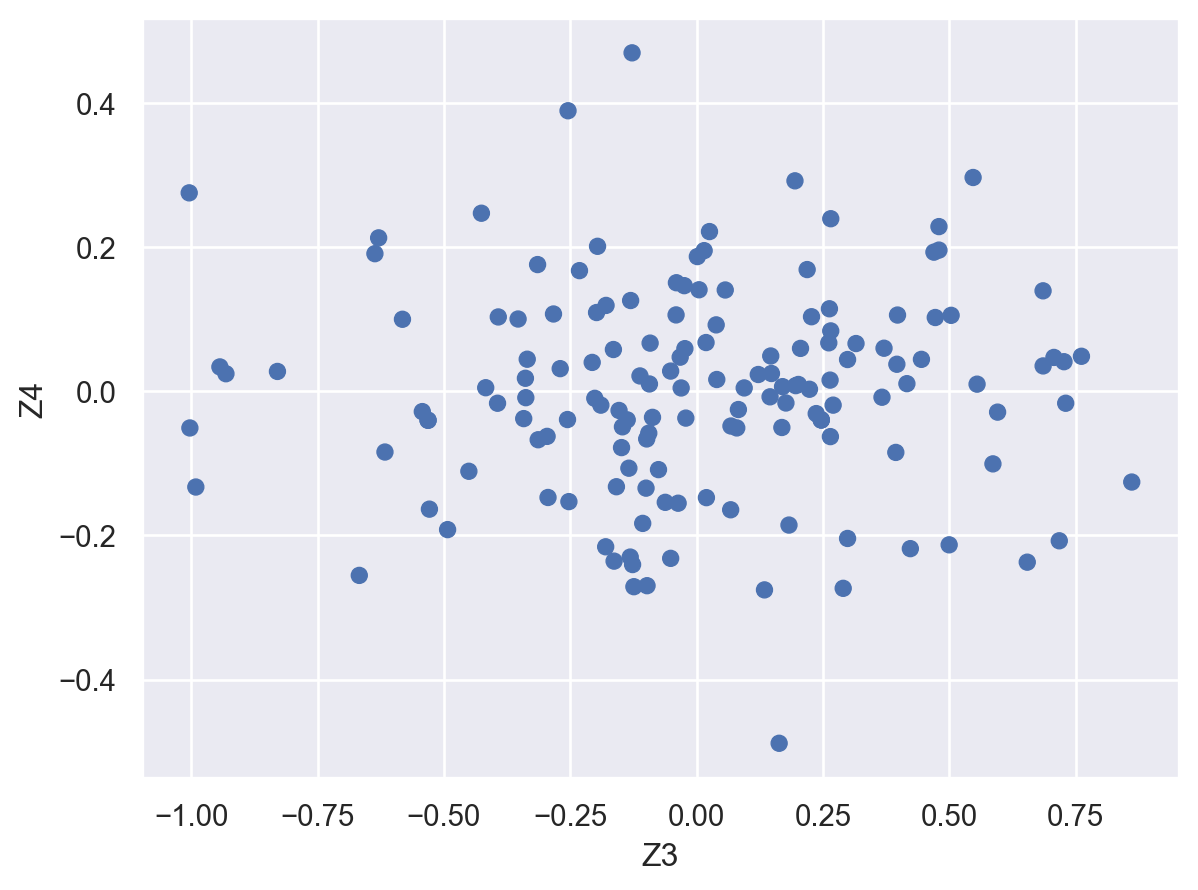

In [10]:
so.Plot(data=Z, x="Z3",y="Z4").add(so.Dot())

Vemos Varianza

In [11]:
porcentajeVarianza = gamma/sum(gamma)

print("Porcentajes de Varianza: ", porcentajeVarianza)

Porcentajes de Varianza:  [0.00515193 0.03683832 0.23030523 0.72770452]


Podemos ignorar nuestras longitudes del sepalo ya que importantan los del petalo, entonces la informacion quedaria de la siguiente manera

In [14]:
data = dataEstrella @ U[2:4,:].transpose()

#ESTO ES LO MAS IMPORTANTE RECORDA ESTO O USA PCA DE SKLEARN Y DEJA DE HACER COSAS A MANO PELOTUDO

data = data.rename(columns={0:"Z1", 1:"Z2"})

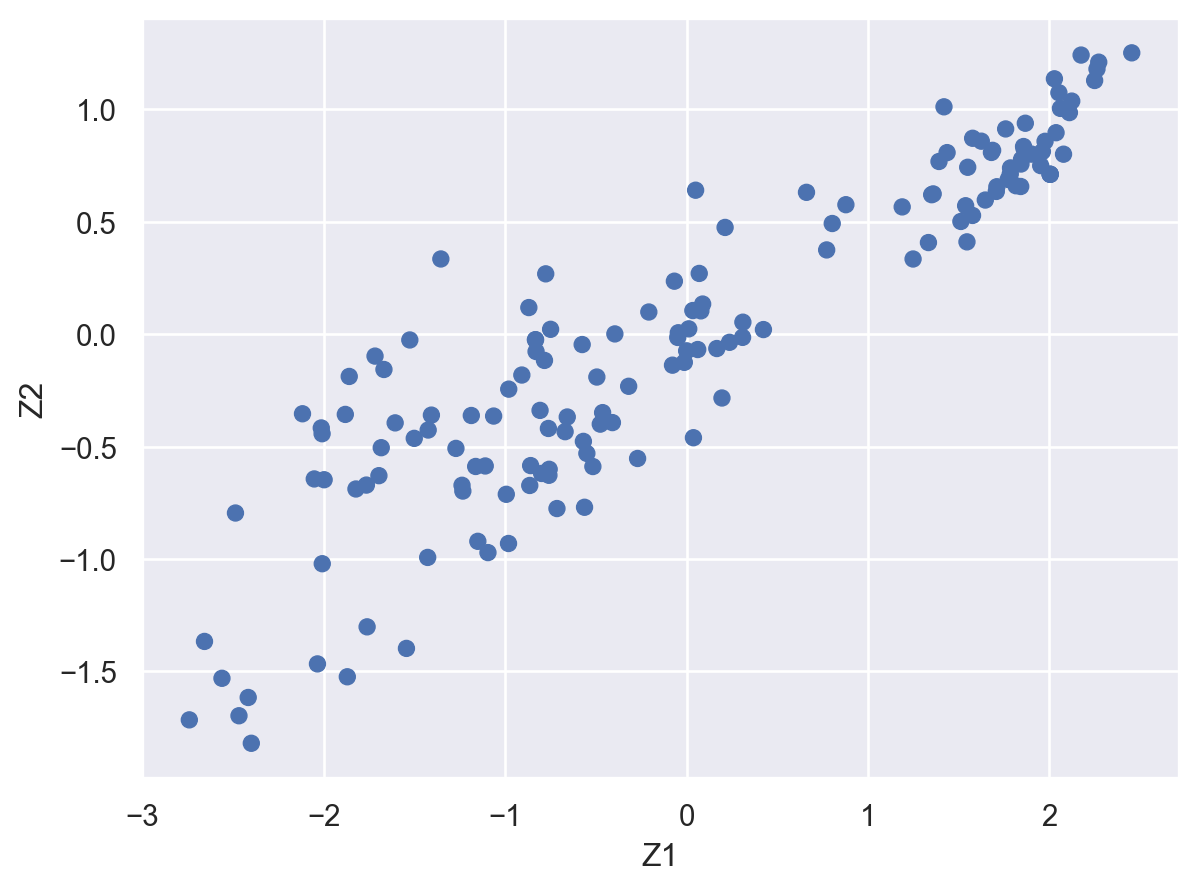

In [15]:
so.Plot(data=data, x="Z1",y="Z2").add(so.Dot())